Term Project: Support Vector Machines
By: John Nelson

### What exactly is a Support Vector Machines(SVMS)?

SVMS is a machine learning algorithm that can be used to solve both classification and regression problems. The way they attempt to solve classification problems is by attempting to draw a decision boundary between classes that is as wide as possible for values of different classes. In a  classification problem, an SVMS allows for misclassifications making the algorithm more tolerant to outliers in the data. Due to SVMS allowing misclassification, the distance between observations and the decision boundary or threshold for classification is known as a Soft Margin. SVMS uses cross-validation to determine how many observations should be allowed to be inside of the Soft Margin to end up with the best classification. Support Vector classifiers use the observations on the edge and inside the Soft Margin as the Support Vectors used for classifying examples.    

In [77]:
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt

##The below code is from https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html 
##and was slightly altered so I can display decison boundaries throughout my notebook 
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def DecisonBoundary(classifiers,titles,X0,X1,xx,yy,yValues,xlabel,ylabel):
    for clf, title, ax in zip(classifiers, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=yValues, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    plt.show()


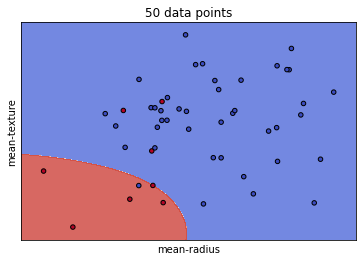

In [78]:
cancer = datasets.load_breast_cancer()
cancerexampleX = cancer.data[:, :2]
cancerexampley = cancer.target
cancerXt=cancerexampleX[1:51]
canceryt=cancerexampley[1:51]
d50=svm.SVC()
d50.fit(cancerXt,canceryt)
X0, X1 = cancerXt[:, 0], cancerXt[:, 1]
xx, yy = make_meshgrid(X0, X1)
title=('50 data points')
fig, ax = plt.subplots()
plot_contours(ax, d50, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=canceryt, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('mean-radius')
ax.set_ylabel('mean-texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

The above graph is the decision boundary of only the first 2 features and 50 data points from the scikit-learn Breast Cancer dataset. The reason why only the first two features are being used is so that we can visualize the decision boundary easily. With only 50 data points we can see that some datapoints have been misclassified and that there already appears to be an outlier in the data. As mentioned earlier this was one of the strengths of SVMS. If SVMS didn't use a soft Margin and instead used a Maximum margin or we used a Maximum Margin Classifier, the decision boundary would not have accounted for the outlier we see as well. This would then lead to a lower reported accuracy for the classifier.    

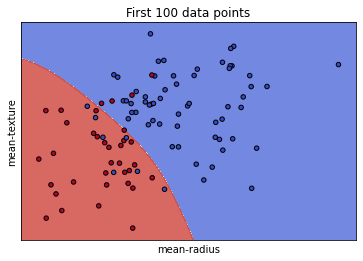

In [79]:
cancerXt=cancerexampleX[1:100]
canceryt=cancerexampley[1:100]
d100=svm.SVC()
d100.fit(cancerXt,canceryt)
X0, X1 = cancerXt[:, 0], cancerXt[:, 1]
xx, yy = make_meshgrid(X0, X1)
title=('First 100 data points')
fig, ax = plt.subplots()
plot_contours(ax, d100, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=canceryt, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('mean-radius')
ax.set_ylabel('mean-texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Now that the first 100 data points are being used for fitting the classifier we see quite a different decision boundary for the classifier. This is mainly due to the classifier having more observations, As more data is classified not only do we get a better representation of what the decision boundary will look like but also the decision boundary becomes less likely to see drastic changes.  

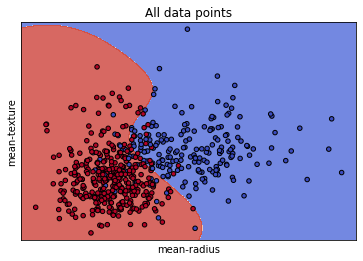

In [5]:
dAll=svm.SVC()
d100.fit(cancerexampleX,cancerexampley)
X0, X1 = cancerexampleX[:, 0], cancerexampleX[:, 1]
xx, yy = make_meshgrid(X0, X1)
title=('All data points')
fig, ax = plt.subplots()
plot_contours(ax, d100, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=cancerexampley, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('mean-radius')
ax.set_ylabel('mean-texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

### The Kernel parameter
Now that we are using the entire data set's first two features for classification(569 observations), we see the decision boundary drastically change again compared to when only 100 points were graphed. While the decision boundary has changed more and more each time we have added more data, the general shape of the boundary is due to the Kernel function that is being used by the classifier. The default kernel used by the svm.SVC() function is the Radial Basis Function(RBF) kernel. Along with the RBF kernel, there are 4 others but the only other two that we will be discussing and using in this notebook are the linear and polynomial kernels. Choosing the correct kernel parameter for an SVM is one of the most important parts of making the classifier. The linear kernel is best used when you have linear data. Attempting to use a linear kernel on non-linear data will lead to poor results. While the RBF kernel not only will more than likely perform poorly on linear data compared to the linear kernel but it is also very expensive. The RBF kernel is more expensive than the linear kernel and is practically useless with very large data sets due to how long it will take. However, the RBF kernel while being time-consuming, will be more accurate on non-linear data than the linear kernel. The polynomial kernel much like the RBF kernel allows for the classification of non-linear data and like the name suggestions tests features and feature combinations in a polynomial fashion. The polynomial kernel is more comparable to the RBF kernel but it is a bit less expensive to run. 

### The C parameter

The C parameter is another very important parameter for an SVM and the forming of its decision boundary. C controls the tradeoff between having a smooth decision boundary and classifying all of the training points correctly. In other words, having a decision boundary that would be relatively straight or one that is more jagged and wiggly. While a wiggly and more jagged decision boundary may fit the training data better, when exposed to the test data it will have a harder time generalizing to the test data than a straighter decision boundary. Larger values of C tend to lead to a more wiggly decision boundary and smaller values for C lead to a straighter decision boundary.


The code below demonstrates the difference in accuracy reported from various combinations of  Kernel and C parameters on the Breast Cancer data set. Unlike the classifiers above these classifiers are using normalized data. The reason why non-normalized data was used above was due to me wanting the decision boundary as easy as possible to view. In general, when using SVMs it is best to use normalized data. All of the Classifiers used below are trained and tested with the same train test split to prevent the accuracy of a classifier from benefiting based on it receiving an advantageous or disadvantageous split of data compared to other splits.  


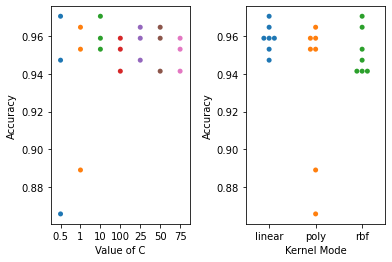

,Average Accuracy
C=0.5,0.927875
C=1,0.935673
C=10,0.961014
C=25,0.957115
C=50,0.955166
C=75,0.951267
C=100,0.951267
,Average Accuracy
Kernel=Linear,0.959064
Kernel=Poly,0.934837


In [80]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
from IPython.display import display_html
## code for displaying multiple multiple tables in same cell found from
##https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)


def svmCancer(X_train,X_test,y_train,y_test,Cparam,kernelparam):
    Accuracy=[]
    linAcc=[]
    polyAcc=[]
    rbfAcc=[]
    linearKernalData=[]
    chalf=[]
    c1=[]
    c10=[]
    c25=[]
    c75=[]
    c50=[]
    c100=[]
    models=[]
    for x in Cparam:
        for y in kernelparam: 
            models.append(svm.SVC(C=x,kernel=y))
    i=0
    x=101
    y=""
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        if(i<=2):
            x=0.5
        elif(i<=5):
            x=1
        elif(i<=8):
            x=10
        elif(i<=11):
            x=25
        elif(i<=14):
            x=50
        elif(i<=17):
            x=75
        else:
            x=100
        if(i%3==0):
            y='linear'
        elif(i%3==1):
            y='poly'
        else:
            y='rbf'
        acc=metrics.accuracy_score(y_test, y_pred)
        Accuracy.append(acc)
        if(y=='linear'):
            linAcc.append(acc)
            if(x==1):
                c1.append(acc)
            elif(x==0.5):
                chalf.append(acc)
            elif(x==10):
                c10.append(acc)
            elif(x==100):
                c100.append(acc)
            elif(x==25):
                c25.append(acc)
            elif(x==75):
                c75.append(acc)
            else:
                c50.append(acc)
        elif(y=='poly'):
            polyAcc.append(acc)
            if(x==1):
                c1.append(acc)
            elif(x==0.5):
                chalf.append(acc)
            elif(x==10):
                c10.append(acc)
            elif(x==100):
                c100.append(acc)
            elif(x==25):
                c25.append(acc)
            elif(x==75):
                c75.append(acc)
            else:
                c50.append(acc)
        else:
            rbfAcc.append(acc)
            if(x==1):
                c1.append(acc)
            elif(x==0.5):
                chalf.append(acc)
            elif(x==10):
                c10.append(acc)
            elif(x==100):
                c100.append(acc)
            elif(x==25):
                c25.append(acc)
            elif(x==75):
                c75.append(acc)
            else:
                c50.append(acc)
        i=i+1
        
    kernAcc=np.empty([21])
    linAcc=np.array(linAcc)
    polyAcc=np.array(polyAcc)
    rbfAcc=np.array(rbfAcc)
    np.concatenate((linAcc,polyAcc,rbfAcc),axis=None,out=kernAcc)
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    cValue =["0.5"]*3+ ["1"]*3+ ["10"]*3+["25"]*3+["50"]*3+["75"]*3+["100"]*3
    Cdf = pd.DataFrame({"Accuracy" : Accuracy, "Value of C":cValue})
    sns.swarmplot(x="Value of C", y="Accuracy",  data=Cdf, ax=ax1)

    KernValue = ["linear"]*7+["poly"]*7+["rbf"]*7
    Kdf = pd.DataFrame({"Accuracy" : kernAcc, "Kernel Mode":KernValue})
    sns.swarmplot(x="Kernel Mode", y="Accuracy",  data=Kdf, ax=ax2)
    plt.show()

    averageAccLin=np.mean(linAcc)
    averageAccpoly=np.mean(polyAcc)
    averageAccrbf=np.mean(rbfAcc)

    data=[averageAccLin,averageAccpoly,averageAccrbf]
    KernelTable=pd.DataFrame(data, columns=["Average Accuracy"], index=['Kernel=Linear','Kernel=Poly','Kernel=rbf'])
    avghalf=np.mean(chalf)
    avgC1=np.mean(c1)
    avgC10=np.mean(c10)
    avgC50=np.mean(c50)
    avgC100=np.mean(c100)
    avgC25=np.mean(c25)
    avgC75=np.mean(c75)
    data2=[avghalf,avgC1,avgC10,avgC25,avgC50,avgC75,avgC100]
    CvalueTable=pd.DataFrame(data2, columns=["Average Accuracy"], index=['C=0.5','C=1','C=10','C=25','C=50','C=75','C=100'])
    return CvalueTable,KernelTable
newcancer = datasets.load_breast_cancer()
newcancerX = newcancer.data
newcancery = newcancer.target  
newCancerXnorm=preprocessing.scale(newcancerX)
Cparam=[0.5,1,10,25,50,75,100]
kernelparam=['linear','poly','rbf']
X_train, X_test, y_train, y_test = train_test_split(newCancerXnorm, newcancery, test_size=0.3,random_state=1)
cAcc1,KernelAcc1=svmCancer(X_train,X_test,y_train,y_test,Cparam,kernelparam)

display_side_by_side(cAcc1,KernelAcc1)

### Comparison of results above 

Based on the results above we can observe quite a few things about how the C parameter and Kernel parameter can impact the reported accuracy of the classifier. We can see in the table above that the cancer datasets' accuracy increased as the values of C grew. When C hit 10 however is when we see that it reaches its highest average reported accuracy.  When looking at the two tables above we can see that the C values of 0.5 and 1 led to lower average accuracies than the larger values of C. This is kinda deceiving because we can see in the graphs above that the polynomial kernel was the only one to struggle with these values.  The C values of 0.5 and 1 when ran with the polynomial kernel reported the lowest accuracies out of any other combination of C and kernel values.  Something else that is important that you can see above is that one of the highest reported accuracies were reported with a C value of 0.5. This shows the importance of picking the proper kernel and C combinations when designing your classifier. 

When looking at how the different kernels performed with the various values of C we see that the Linear and RBF kernels both had the same highest accuracy and second-highest accuracy reported. We can also see that the poly kernels' highest reported accuracy is equal to these as well. Overal all 3 kernels reported pretty similar average accuracies but the linear kernel gets the edge because it dealt best with varying values of C    

When run, the code below illustrates the impact that some of these Kernel and C value combinations shown above have on the decision boundary of the classifier. (This code will take some time to run due to using non-normalized data to make visualizing the decision boundary and where the data points fall) 

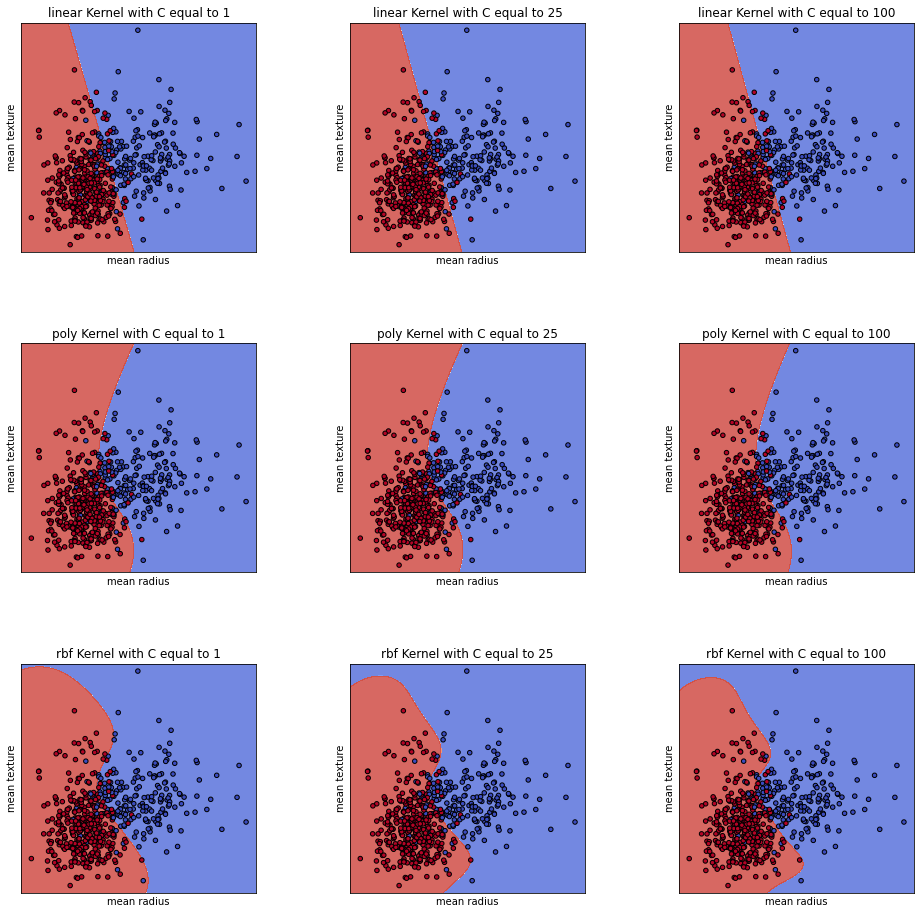

In [7]:
newCparams=[1,25,100]
AllDataX=cancer.data[:,:2]
AllDatay=cancer.target
FullDataClassifiers=[]
plotTitles=[]
for k in kernelparam:
    for c in newCparams:
        FullDataClassifiers.append(svm.SVC(kernel=k,C=c))
        aTitle="{} Kernel with C equal to {}".format(k,c)
        plotTitles.append(aTitle)

FullDataClassifiers=(classifier.fit(AllDataX,AllDatay)for classifier in FullDataClassifiers)
fig, sub = plt.subplots(3, 3,figsize=(16,16))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = AllDataX[:, 0], AllDataX[:, 1]
xx, yy = make_meshgrid(X0, X1)

DecisonBoundary(FullDataClassifiers,plotTitles,X0,X1,xx,yy,AllDatay,'mean radius','mean texture')

### Kernel and C parameters impact on the decison boundary 
The C values used were 1, 25, and 100. I choose these C values to see the impact growing C values have on each of the kernels' decision boundaries. 

**Linear Kernel:** The first row of decision boundaries shown above are produced by the linear kernel. As expected from the linear kernel we see decision boundaries that are just simple straight lines. As the value of the C parameter is increased we do not see any change in the decision boundary.    

**Polynomial Kernel:** The next row of decision boundaries are produced from the Polynomial Kernel. Much like the Decision boundaries of the linear kernel, as the value of C is increased we don't see much change in the decision boundary. Another similarity to the linear kernel is the location of the boundary is generally the same area. However, the shape of the decision boundaries produced from the poly kernel is very different than the ones from the linear kernel. 

**Radial basis function(RBF) Kernel:** The final row of decision boundaries are produced from the RBF kernel. Unlike the decision boundaries of the Polynomial and linear kernels, we can see the decision boundary change as the Value of C is increased. The shape of the decision boundary is much similar to that of the Polynomial kernel mainly due to also attempting to classifier points in a non-linear way. The Radial basis function Kernel and its decision boundary differ from the polynomial kernel partially because squared Euclidean distance along with some other math is used in the decision function of the RBF kernel. 
   

### Finding Optimal Parameters for different datasets 
Now we will be trying to find what combination of C and Kernel parameters lead to optimal performance for SVMs for different data sets. In a few of the data sets, we will also play around with another parameter that the scikit-learn SVM library supports. Explanations for these additional data sets will be provided below when they are used for a data set. 

For all of the data sets below, we will compare the scikit-learn implementation of SVMs with default parameters, and the scikit-learn implementation of the Random Forest Classifier(RFC) that we covered in class. The RFC will also be using the default parameters, both of these will be used to compare to SVM classifier with optimal parameters. The reasoning behind using the Random Forest classifier as a comparison is due to currently this method of classification is widely viewed as one of the best. The most important thing to know about the default parameters of the Random forest Classifier used is that the number of trees in the forest is set to 100. While the most important thing to know about the default parameters of the
SVM is that C is set to 1 and the kernel is set to RBF. 

When first attempting to find optimal parameters for data sets the below code was used:


In [81]:
cancer = datasets.load_breast_cancer()
cancerX = cancer.data
cancery = cancer.target 
CancerXnorm=preprocessing.scale(cancerX)
X_traincancer, X_testcancer, y_traincancer, y_testcancer = train_test_split(CancerXnorm, cancery,
                                                                            test_size=0.3,random_state=3)
kernelparam=['linear', 'poly', 'rbf']
Cparams=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
for i in range(1,101):
    Cparams.append(i)
param={'C': Cparams,'kernel': kernelparam}

grid_svc = GridSearchCV(svm.SVC(), param_grid=param, scoring='accuracy')
grid_svc.fit(CancerXnorm,cancery)
print(grid_svc.best_params_)

{'C': 6, 'kernel': 'rbf'}


The starting point code above for finding optimal parameters is being demonstrated on the cancer data set which is relatively small compared to the other data sets used in this notebook. Even with the small size of this data set this still takes a while to run due to the large number of classification combinations being tested in the GridSearch. In total 118 C values were tested on 3 different kernels, meaning that 354 classifiers were compared. For the larger datasets used in this notebook, I initially used this method to test parameters and it took a very long time. Due to this for the other data sets in this notebook, I chose to simplify down the Grid Search down after the initial run so that it could be run in a reasonable time.  

**Reasoning for the range of C values used:** due to small and large C values being useful for different data sets, I wanted to test the data sets with a range of C values that was large and diverse enough to account for datasets that would prefer small values and ones that would prefer large Values of C. The reason why I set 0.1 and 100 as the boundaries for C is that I felt as if any larger or smaller values of C would either put too much weight or not enough weight on a decision. Even though you could very easily argue that already 100  is way too high, I wanted to be extra safe when attempting to find optimal parameters. 

### Cancer Data Set classsifier Comparison 

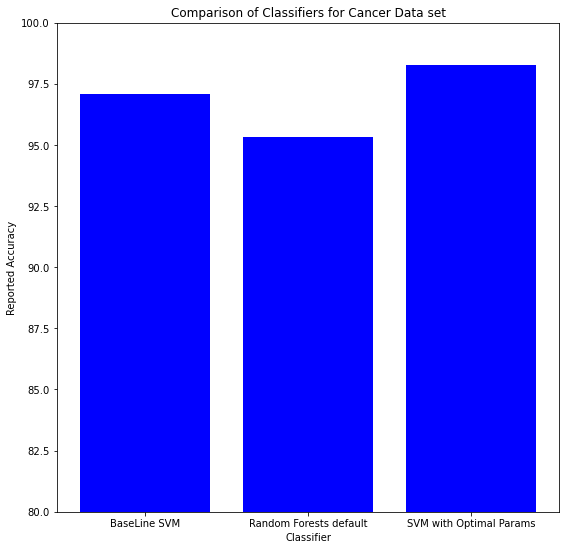

,Reported Accuracy
BaseLine SVM,97.076023
Random Forests default,95.321637
SVM with Optimal Params,98.245614


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC
CancerAccuracy=[]

#cancer dataset default SVM parameter
cancersvmBL = svm.SVC()
cancersvmBL.fit(X_traincancer, y_traincancer)
y_pred = cancersvmBL.predict(X_testcancer)
svmBLcancerAccuracy=accuracy_score(y_testcancer, y_pred)*100
CancerAccuracy.append(svmBLcancerAccuracy)

#cancer dataSet Random forests default  
cancerRF = RandomForestClassifier()
cancerRF.fit(X_traincancer, y_traincancer)
y_pred = cancerRF.predict(X_testcancer)
cancerRfAccuracy=accuracy_score(y_testcancer, y_pred)*100
CancerAccuracy.append(cancerRfAccuracy)

#cancer data set optimal parameters
cancersvmOptimal = svm.SVC(C=6,kernel='rbf')
cancersvmOptimal.fit(X_traincancer, y_traincancer)
y_pred = cancersvmOptimal.predict(X_testcancer)
svmOptimalcancerAccuracy=accuracy_score(y_testcancer, y_pred)*100
CancerAccuracy.append(svmOptimalcancerAccuracy)

clfCancerInfo =['BaseLine SVM','Random Forests default','SVM with Optimal Params']
plt.figure(figsize=(9, 9))
plt.ylim(80,100)
plt.bar(clfCancerInfo,CancerAccuracy,color='blue')
plt.xlabel('Classifier')
plt.ylabel('Reported Accuracy')
plt.title('Comparison of Classifiers for Cancer Data set')
plt.show()

cancerAccuracyTable=pd.DataFrame(CancerAccuracy, columns=["Reported Accuracy"], index=clfCancerInfo)
display(cancerAccuracyTable)

Based on the results above we see that even the Baseline SVM parameters of C=1 and an rbf kernel performed better than the random forests with 100 trees. This is most likely due to the optimal SVM parameters for this data set shared the same kernel and a relatively similar C value. When looking at the increase in accuracy from default to Optimal parameters we see that the optimal parameters lead to a little more than a 1% increase in accuracy. 

### QSAR Data set  classifier comparison

In [87]:
from sklearn.preprocessing import LabelEncoder
#loading in qsar dataset
def load_qsar():    
    qsarNames=['SpMax_L','J_Dz(e)','nHM','F01[N-N]','F04[C-N]','NssssC','nCb-','C%','nCp','nO','F03[C-N]','SdssC',
    'HyWi_B(m)','LOC','SM6_L','FO3[C-0]','Me','Mi','Nn-n','nArNO2','nCRX3','SpPosA_B(p)','nCIR','B01[C-Br]',
    'B03[C-Cl]','N-073','SpMax_A','Psi_i_1d','B04[C-Br]','SdO','TI2_L','nCrt','C-026','F02[C-N]','nHDon',
    'SpMax_B(m)','Psi_i_A','nN','SM6_B(m)','nArCOOR','nX','experimental class']
    qsar=pd.read_csv('biodeg.csv',sep=";",names=qsarNames)
    label_quality = LabelEncoder()
    qsar['experimental class'] = label_quality.fit_transform(qsar['experimental class'])
    X=qsar.drop('experimental class',axis=1)
    y=qsar['experimental class']
    return X,y

qsarX,qsary= load_qsar()
qsarXnorm=preprocessing.scale(qsarX)
X_trainqsar, X_testqsar, y_trainqsar, y_testqsar = train_test_split(qsarXnorm, qsary, test_size=0.3, random_state=1)

kernelparam=['rbf','poly','linear']
Cparams=[]
for i in range(1,21):
    Cparams.append(i)
param={'C': Cparams,'kernel': kernelparam}
grid_svc2 = GridSearchCV(svm.SVC(), param_grid=param, scoring='accuracy')
grid_svc2.fit(X_trainqsar, y_trainqsar)
print(grid_svc2.best_params_)


{'C': 18, 'kernel': 'rbf'}


After running the initial grid search from the previous cell, It was determined that a C value of 18 and with the kernel being set to RBF  was the best choice. Once this was determined I decided to make the Cparams array just go up to 20 starting from 1.   Something I did differently with this data set than the cancer data set and will do on the remaining data sets as well is, I only used the training data for fitting the classifiers in the grid search and not the entire data set.  

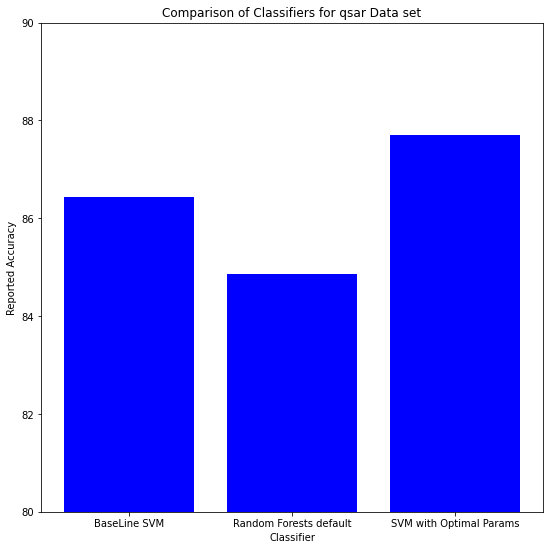

,Reported Accuracy
BaseLine SVM,86.435331
Random Forests default,84.858044
SVM with Optimal Params,87.697161


In [95]:
qsarAccuracy=[]
#qsarDataset default SVM parameters
qsarsvmBL = svm.SVC()
qsarsvmBL.fit(X_trainqsar, y_trainqsar)
y_pred = qsarsvmBL.predict(X_testqsar)
svmBLqsarAccuracy=accuracy_score(y_testqsar, y_pred)*100
qsarAccuracy.append(svmBLqsarAccuracy)

#qsar dataset Random forests
qsarRF = RandomForestClassifier()
qsarRF.fit(X_trainqsar, y_trainqsar)
y_pred = qsarRF.predict(X_testqsar)
RFqsarAccuracy=accuracy_score(y_testqsar, y_pred)*100
qsarAccuracy.append(RFqsarAccuracy)

#qsarDataset optimal SVM parameters
qsarsvmOptimal = svm.SVC(C=18, kernel='rbf')
qsarsvmOptimal.fit(X_trainqsar, y_trainqsar)
y_pred = qsarsvmOptimal.predict(X_testqsar)
svmOptimalqsarAccuracy=accuracy_score(y_testqsar, y_pred)*100
qsarAccuracy.append(svmOptimalqsarAccuracy)


clfQsarInfo =['BaseLine SVM','Random Forests default','SVM with Optimal Params']
plt.figure(figsize=(9, 9))
plt.ylim(80,90)
plt.bar(clfQsarInfo,qsarAccuracy,color='blue')
plt.xlabel('Classifier')
plt.ylabel('Reported Accuracy')
plt.title('Comparison of Classifiers for qsar Data set')
plt.show()

qsarAccuracyTable=pd.DataFrame(qsarAccuracy, columns=["Reported Accuracy"], index=clfQsarInfo)
display(qsarAccuracyTable)


**Once again the default parameter SVM outperformed the Random forests classifier and we also see roughly another 1% increase from the default parameters and the Optimal parameters on the qsar data set. This again can most likely be attributed to the default SVM kernel parameter being selected as the optimal kernel**

### Wine Data set  classifier comparison 

When I first attempted to use the wine data set both the baseline SVM Classifier and the Random Forest Classifier accuracy were in the mid-50s. This was because the wine data set initially had, 7 different classification classes. The fact that the data set had 7 different classes wasn't the issue the issue was that many of the classes only had a couple of observations so the classifier wasn't able to ever get any of them right. At this point, I attempted to split the data up based on if the class rating was less than or equal to 5 or if it was greater than 5. When I did this, the baseline SVM classifier was reporting 100 percent accuracy. That's when I came to the division of data that I currently have now. The wine data set has been turned into a binary classification with about a 6:1 ratio between the two classes.

**Gamma:** Gamma is the Kernel coefficient for both the rbf and poly kernel types. In scikit-learn gamma is either scale, auto, or a floating point number. By default gamma is scale and the value of the default gamma is (1 / the  number of features*X.var()). The value of gamma when it is auto is just 1/ the number of features. 

After I had attempted to find the optimal parameters for this data set multiple times I kept either having accuracies that would vary by less than a 10th of a percent from the baseline or even in some instances was even less than the base parameters for the SVM classifier. At this point, I decided to start testing with gamma. I believe that the issues I've had with this data set came from me altering the data and the class values. 

In [12]:
def load_redwine():
    wine=pd.read_csv('winequality-red.csv',sep=';')
    classification_groups=(2,6.5,8)
    group_values=['bad','good']
    wine['quality']=pd.cut(wine['quality'],bins=classification_groups,labels=group_values)
    label_quality = LabelEncoder()
    wine['quality'] = label_quality.fit_transform(wine['quality'])
    X=wine.drop('quality',axis=1)
    y=wine['quality']
    return X,y

wineX,winey=load_redwine()
wineXnorm=preprocessing.scale(wineX)
X_trainwine, X_testwine, y_trainwine, y_testwine = train_test_split(wineXnorm, winey, test_size=0.3, random_state=1)

kernelparam=['rbf','poly']
Cparams=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
gamma=['scale','auto',0.1,0.2,0.3]
    
param={'C': Cparams,'kernel': kernelparam,'gamma':gamma}
grid_svc = GridSearchCV(svm.SVC(), param_grid=param, scoring='accuracy')
grid_svc.fit(X_trainwine, y_trainwine)
print(grid_svc.best_params_)

{'C': 1.6, 'gamma': 0.3, 'kernel': 'rbf'}


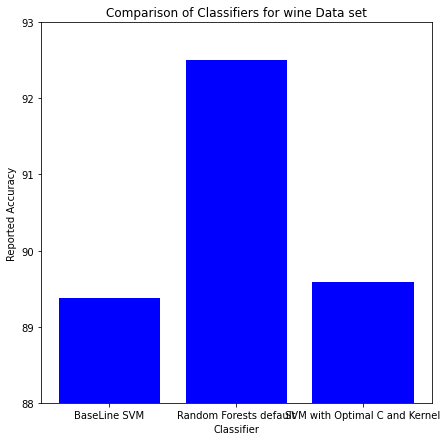

,Reported Accuracy
BaseLine SVM,89.375000
Random Forests default,92.500000
SVM with Optimal C and Kernel,89.583333


In [94]:
wineAccuracy=[]

#wine dataset default SVM parameter
winesvmBL = svm.SVC()
winesvmBL.fit(X_trainwine, y_trainwine)
y_pred = winesvmBL.predict(X_testwine)
svmBLwineAccuracy=accuracy_score(y_testwine, y_pred)*100
wineAccuracy.append(svmBLwineAccuracy)
#wine dataset Random forest 
wineRF = RandomForestClassifier()
wineRF.fit(X_trainwine, y_trainwine)
y_pred = wineRF.predict(X_testwine)
RFwineAccuracy=accuracy_score(y_testwine, y_pred)*100
wineAccuracy.append(RFwineAccuracy)

#wine dataset Optimal SVM parameters
winesvmopt = svm.SVC(C=1.6,kernel='rbf',gamma=0.3)
winesvmopt.fit(X_trainwine, y_trainwine)
y_pred = winesvmopt.predict(X_testwine)
svmOptimalwineAccuracy=accuracy_score(y_testwine, y_pred)*100
wineAccuracy.append(svmOptimalwineAccuracy)

clfwineInfo =['BaseLine SVM','Random Forests default','SVM with Optimal C and Kernel']
plt.figure(figsize=(7, 7))
plt.ylim(88,93)
plt.bar(clfwineInfo,wineAccuracy,color='blue')
plt.xlabel('Classifier')
plt.ylabel('Reported Accuracy')
plt.title('Comparison of Classifiers for wine Data set')
plt.show()

wineAccuracyTable=pd.DataFrame(wineAccuracy, columns=["Reported Accuracy"], index=clfwineInfo)
display(wineAccuracyTable)

Based of the results above we see that for the first time the Random forest classifier with 100 trees was able to outpreform both the optimal SVM classifier and the base classsifier.

### Credit Card default data set classifier comparison

In [74]:
def load_cc():
    X, y = [],[]
    with open('defaultccEdited.csv') as f:
        for line in f :
            tokens = line[:-1].split(';')
            tokens= remove_white_space(tokens)
            data = [int(token) for token in tokens[:-1]]
            X.append(data)
            y.append(tokens[-1])
    return np.array(X), np.array(y)
def remove_white_space(x):
    length=len(x)
    for i in range(length):
        x[i]=x[i].replace(" ", "")
    return(x)

ccX,ccy=load_cc()
ccXnorm=preprocessing.scale(ccX)
X_traincc, X_testcc, y_traincc, y_testcc = train_test_split(ccXnorm, ccy, test_size=0.7, random_state=5)
Cparams=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]

kernelparam=['rbf']

param={'C': Cparams,'kernel':kernelparam}
grid_svc = GridSearchCV(svm.SVC(), param_grid=param, scoring='accuracy')
grid_svc.fit(X_traincc, y_traincc)
print(grid_svc.best_params_)

{'C': 1.8, 'kernel': 'rbf'}


The credit Card data set was by far the larger data set that I used in this notebook. It contains 30,000 observations and also has 24 features. When I first ran this data set with the original data set it took nearly 10 hours to complete. When it finished, however, it found that a kernel value of RBF and a C value of 1.8 was the optimal parameters.

C:\Users\wendy\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass C=81.26666666666667 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


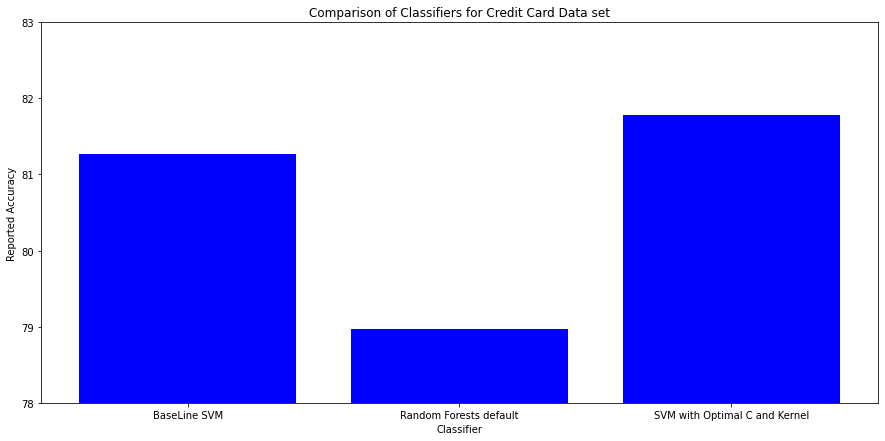

,Reported Accuracy
BaseLine SVM,81.266667
Random Forests default,78.966667
SVM with Optimal C and Kernel,81.776190


In [96]:
ccAccuracy=[]
#cc dataSet Random forests
ccRF = RandomForestClassifier()
ccRF.fit(X_traincc, y_traincc)
y_pred = ccRF.predict(X_testcc)
ccRFAccuracy=accuracy_score(y_testcc, y_pred)*100
ccAccuracy.append(ccRFAccuracy)

#cc dataset default SVM parameter
ccsvmBL = svm.SVC(ccRFAccuracy)
ccsvmBL.fit(X_traincc, y_traincc)
y_pred = ccsvmBL.predict(X_testcc)
svmBLccAccuracy=accuracy_score(y_testcc, y_pred)*100
ccAccuracy.append(svmBLccAccuracy)

##cc optimal
ccsvmOptimal = svm.SVC(C=1.8)
ccsvmOptimal.fit(X_traincc, y_traincc)
y_pred = ccsvmOptimal.predict(X_testcc)
svmOptimalccAccuracy=accuracy_score(y_testcc, y_pred)*100
ccAccuracy.append(svmOptimalccAccuracy)

clfccInfo =['BaseLine SVM','Random Forests default','SVM with Optimal C and Kernel']
plt.figure(figsize=(15, 7))
plt.ylim(78,83)
plt.bar(clfccInfo,ccAccuracy,color='blue')
plt.xlabel('Classifier')
plt.ylabel('Reported Accuracy')
plt.title('Comparison of Classifiers for Credit Card Data set')
plt.show()

ccAccuracyTable=pd.DataFrame(ccAccuracy, columns=["Reported Accuracy"], index=clfccInfo)
display(ccAccuracyTable)

Based on the results from the code above we once again see that both SVM Classifiers were able to outpreform the Random forests classifiers. This time the optimal parameters resulted in about a 1/2 percent increase compared to the optimal.

### Key Things I took away from this project

- **The importance of normalizing data:** Not only does normalizing data help improve classifier accuracy but it also helps with speeding up the time it takes for SVMs to run.


- **Having good clean data:** One of the major issues I had with this project was dealing with data that wasn't optimally set up. From converting the Credit card data to a CSV file to altering the wine data set so that classifications were better, I spent a decent amount of time doing this but it gave me an appreciation for clean data. 


- **The importance of having the right set of parameters:** As was shown at the beginning of my notebook, a  C value with the right kernel parameter can be your optimal C, but when it is being used with the wrong kernel or data set it is practically useless. The same goes for kernel parameters and C values.


- **The limitations of SVMs** While using different kernels does allow for you to solve non-linear problems with SVMs, the time it takes to do so is very long. 


- **Appreciation for SVMs** When I first started looking into this classifier, the idea that you wanted to pick the largest area or widest street as possible for your margin made absolutely no sense to me at all. My initial way of thinking about it was the exact opposite, I was thinking that you would want as small a margin as possible so that your classification groups were more clearly defined. As soon as I realized out all it takes is one outlier early on in your data to destroy your model. My appreciation for SVMs primarily comes from the C value. The different impact it has on classifiers when it is small compared to when it is large is remarkable 